In [1]:
import pandas as pd
import numpy as np
import requests
#from bs4 import BeautifulSoup
import os
#!conda install -c conda-forge folium=0.5.0 --yes
#import folium 
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Done!')

Done!


In [44]:
#Client ID and Secret Hidden


In [7]:
def geo_location(address):
    geolocator = Nominatim(user_agent = 'foursqare_agent')
    location = geolocator.geocode(adress)
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude

def get_venues(lat, lng):
    radius = 400
    LIMIT = 100
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    results = requests.get(url).json()
    venue_data = results["response"]['groups'][0]['items']
    venue_details = []
    for row in venue_data:
        try:
            venue_id = row['venue']['id']
            venue_name = row['venue']['name']
            venue_category = row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names = ['Id','Name','Category']
    df = pd.DataFrame(venue_details,columns = column_names)
    return df

def get_venue_details(venue_id):
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results = requests.get(url).json()
    print(results)
    venue_data = results['response']['venue']
    venue_details = []
    try:
        venue_id = venue_data['id']
        venue_name = venue_data['name']
        venue_likes = venue_data['likes']['count']
        venue_rating = venue_data['rating']
        venue_tips =  venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names = ['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp = requests.get(url).json()
    features = resp['features']
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
    new_york_data = pd.DataFrame(columns = column_names)
    for data in features:
        borough = data['properties']['borough']
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data
        
    

print('done') 
    

done


In [8]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
ny_data.shape

(306, 4)

Text(0, 0.5, 'Number of Neighborhoods')

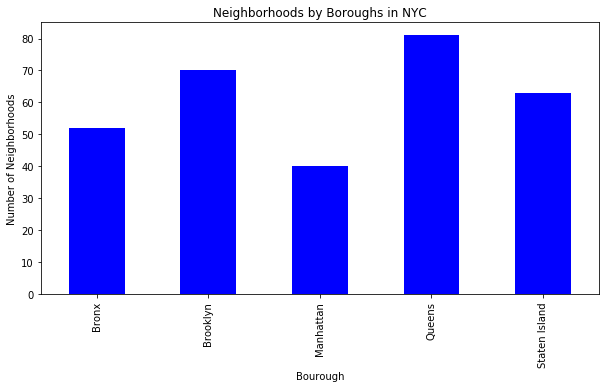

In [10]:
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(color = 'blue', figsize = (10,5))
plt.title('Neighborhoods by Boroughs in NYC')
plt.xlabel('Bourough')
plt.ylabel('Number of Neighborhoods')


In [13]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(ny_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    print(row)
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Resturants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Indian Resturants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Indian Resturants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Indian Resturants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Indian Resturants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Indian Resturants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Indian Resturants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Indian Resturants in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Indian Resturants in Norwood, Bronx:0
['Bronx', 'Norwood',

In [38]:
indian_rest_ny.to_csv('indian_rest_ny_tocsv1.csv')
indian_rest_ny = pd.read_csv('indian_rest_ny_tocsv1.csv')
indian_rest_ny.tail()

,Unnamed: 0,Borough,Neighborhood,ID,Name
26,26,Queens,Bayside,4f1f4996e4b01ff351a7a50c,Ayna Agra Indian Restaurant
27,27,Staten Island,New Dorp,4be74a502468c928505a0243,Taste Of India II
28,28,Queens,Jamaica Hills,4c434b2bd691c9b6ef8f8f0a,Sagar Restaurant
29,29,Manhattan,Sutton Place,4fe4fb50c2eee335e4fea69d,Moti Mahal Delux
30,30,Queens,Sunnyside Gardens,4c48da9f3013a59356c5f0e1,Saffron Garden


In [39]:
indian_rest_ny.shape

(31, 5)

Text(0, 0.5, 'Number of Indian Restraunts')

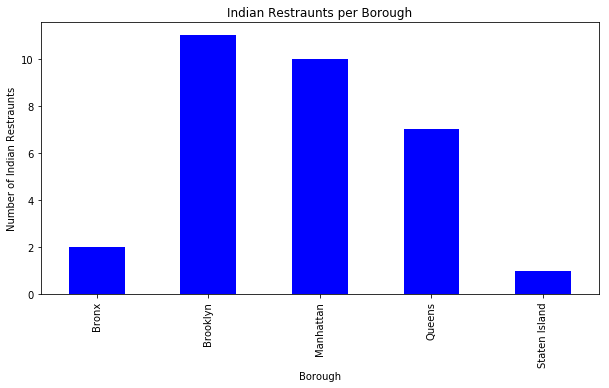

In [40]:
indian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = 'blue')
plt.title('Indian Restraunts per Borough')
plt.ylabel('Number of Indian Restraunts')

In [41]:
indian_rest_ny[indian_rest_ny['Borough']=='Queens']

,Unnamed: 0,Borough,Neighborhood,ID,Name
22,22,Queens,Astoria,5d8d9c5e0a2ffc0008f28855,The Gully
23,23,Queens,Kew Gardens,5782c9ce498edde587f5aa14,Tikka Indian Grill
24,24,Queens,Long Island City,50a287a7e4b0033f830f06db,Raj's Indian Kitchen
25,25,Queens,Rego Park,4b3a8aa5f964a520996925e3,Sajni 026
26,26,Queens,Bayside,4f1f4996e4b01ff351a7a50c,Ayna Agra Indian Restaurant
28,28,Queens,Jamaica Hills,4c434b2bd691c9b6ef8f8f0a,Sagar Restaurant
30,30,Queens,Sunnyside Gardens,4c48da9f3013a59356c5f0e1,Saffron Garden


In [42]:
indian_rest_ny[indian_rest_ny['Borough']=='Manhattan']

,Unnamed: 0,Borough,Neighborhood,ID,Name
13,13,Manhattan,Washington Heights,4ae7876ef964a5201eac21e3,Kismat Indian Restaurant
14,14,Manhattan,Hamilton Heights,54c2bd96498eaf5142e3fe92,Clove Indian Restaurant & Bar
15,15,Manhattan,Manhattanville,529d382a11d2dd5ef107e641,Chapati House - NYC
16,16,Manhattan,Yorkville,4e221f671495f18f035610f6,Mumtaz
17,17,Manhattan,Lenox Hill,547253e6498e45b94affb8d8,Rangoli
18,18,Manhattan,Upper West Side,4b0dec08f964a520ae5223e3,Alachi Masala
19,19,Manhattan,Midtown,5953e40462420b044e8989f4,indikitch
20,20,Manhattan,Greenwich Village,4593ed04f964a52050401fe3,The Kati Roll Company
21,21,Manhattan,Tribeca,4bbb9dbded7776b0e1ad3e51,Tamarind TriBeCa
29,29,Manhattan,Sutton Place,4fe4fb50c2eee335e4fea69d,Moti Mahal Delux


Text(0.5, 1.0, 'Indian Restraunts per Neighborhood')

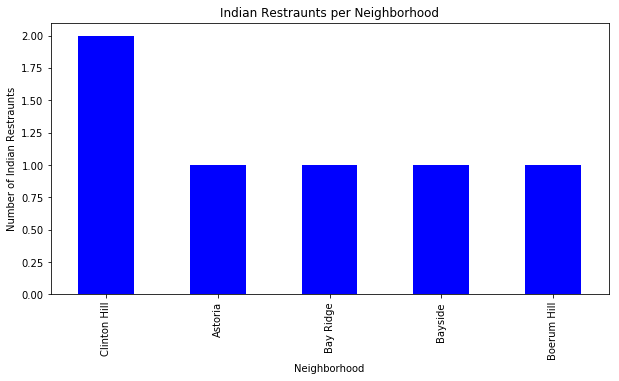

In [43]:
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot.bar(figsize =(10,5), color = 'blue')
plt.ylabel('Number of Indian Restraunts')
plt.title('Indian Restraunts per Neighborhood')

In [21]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1


{'meta': {'code': 200, 'requestId': '5edd428595feaf001b4c6a9f'}, 'response': {'venue': {'id': '4c0448d9310fc9b6bf1dc761', 'name': 'Curry Spot', 'contact': {'phone': '7187085900', 'formattedPhone': '(718) 708-5900'}, 'location': {'address': '4268 Katonah Ave', 'crossStreet': 'E 235 Street', 'lat': 40.897624941880906, 'lng': -73.86714729157393, 'labeledLatLngs': [{'label': 'display', 'lat': 40.897624941880906, 'lng': -73.86714729157393}, {'label': 'entrance', 'lat': 40.897709, 'lng': -73.86707}], 'postalCode': '10470', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4268 Katonah Ave (E 235 Street)', 'Bronx, NY 10470', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/curry-spot/4c0448d9310fc9b6bf1dc761', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
26,Queens,Bayside,4f1f4996e4b01ff351a7a50c,Ayna Agra Indian Restaurant,38,8.2,12
27,Staten Island,New Dorp,4be74a502468c928505a0243,Taste Of India II,29,8.3,14
28,Queens,Jamaica Hills,4c434b2bd691c9b6ef8f8f0a,Sagar Restaurant,10,7.3,6
29,Manhattan,Sutton Place,4fe4fb50c2eee335e4fea69d,Moti Mahal Delux,186,8.5,83
30,Queens,Sunnyside Gardens,4c48da9f3013a59356c5f0e1,Saffron Garden,17,7.7,16


In [37]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny_csv.csv')
indian_rest_stats_ny

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5.0,7.8,10.0
1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3.0,6.0,2.0
2,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill,14.0,7.1,4.0
3,Brooklyn,Greenpoint,51a5445c498ee0f182370cb2,Agra Taj Mahal,34.0,7.3,16.0
4,Brooklyn,Bushwick,5169f5c4e4b0c7fcb77a0f3c,Agra Heights,12.0,5.6,5.0
5,Brooklyn,Brooklyn Heights,4b8ffc16f964a520246e33e3,Curry Heights,31.0,6.9,17.0
6,Brooklyn,Gowanus,52f18573498ec2c34e830ffd,Kanan's Indian Restaurant,24.0,7.9,8.0
7,Brooklyn,Fort Greene,57596dad498e732300496b23,Dosa Royale,77.0,8.8,22.0
8,Brooklyn,Clinton Hill,568d3902498e619efcbc3f58,Spice & Grill,20.0,7.5,6.0
9,Brooklyn,Clinton Hill,4ace7c86f964a520d3d020e3,Kinara's,9.0,5.7,20.0


In [22]:
indian_rest_stats_ny.info

<bound method DataFrame.info of           Borough               Neighborhood                        ID  \
0           Bronx                   Woodlawn  4c0448d9310fc9b6bf1dc761   
1           Bronx                  Unionport  4c194631838020a13e78e561   
2        Brooklyn                  Bay Ridge  545835a1498e820edc6f636f   
3        Brooklyn                 Greenpoint  51a5445c498ee0f182370cb2   
4        Brooklyn                   Bushwick  5169f5c4e4b0c7fcb77a0f3c   
5        Brooklyn           Brooklyn Heights  4b8ffc16f964a520246e33e3   
6        Brooklyn                    Gowanus  52f18573498ec2c34e830ffd   
7        Brooklyn                Fort Greene  57596dad498e732300496b23   
8        Brooklyn               Clinton Hill  568d3902498e619efcbc3f58   
9        Brooklyn               Clinton Hill  4ace7c86f964a520d3d020e3   
10       Brooklyn                Boerum Hill  543870ec498ec64de510608d   
11       Brooklyn  Prospect Lefferts Gardens  4bb93b70cf2fc9b6fe64a002   
12    

In [23]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
Borough         31 non-null object
Neighborhood    31 non-null object
ID              31 non-null object
Name            31 non-null object
Likes           31 non-null object
Rating          31 non-null float64
Tips            31 non-null object
dtypes: float64(1), object(6)
memory usage: 1.8+ KB


In [25]:
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
Borough         31 non-null object
Neighborhood    31 non-null object
ID              31 non-null object
Name            31 non-null object
Likes           31 non-null float64
Rating          31 non-null float64
Tips            31 non-null float64
dtypes: float64(3), object(4)
memory usage: 1.8+ KB


In [26]:
indian_rest_stats_ny.describe()

,Likes,Rating,Tips
count,31.000000,31.000000,31.000000
mean,67.645161,7.345161,23.903226
std,130.153640,1.600800,35.683194
min,0.000000,0.000000,0.000000
25%,13.000000,7.300000,6.000000
50%,27.000000,7.700000,14.000000
75%,53.500000,8.100000,19.000000
max,590.000000,8.800000,148.000000


In [27]:
neighborhood_stats = indian_rest_stats_ny.groupby('Neighborhood',as_index = False).mean()[['Neighborhood','Rating']]
neighborhood_stats.columns = ['Neighborhood','Avg Rating']
neighborhood_stats = neighborhood_stats.sort_values(['Avg Rating'],ascending = True)
neighborhood_stats

,Neighborhood,Avg Rating
0,Astoria,0.0
5,Bushwick,5.6
21,Rego Park,5.9
25,Unionport,6.0
6,Clinton Hill,6.6
4,Brooklyn Heights,6.9
1,Bay Ridge,7.1
12,Jamaica Hills,7.3
9,Greenpoint,7.3
14,Lenox Hill,7.3


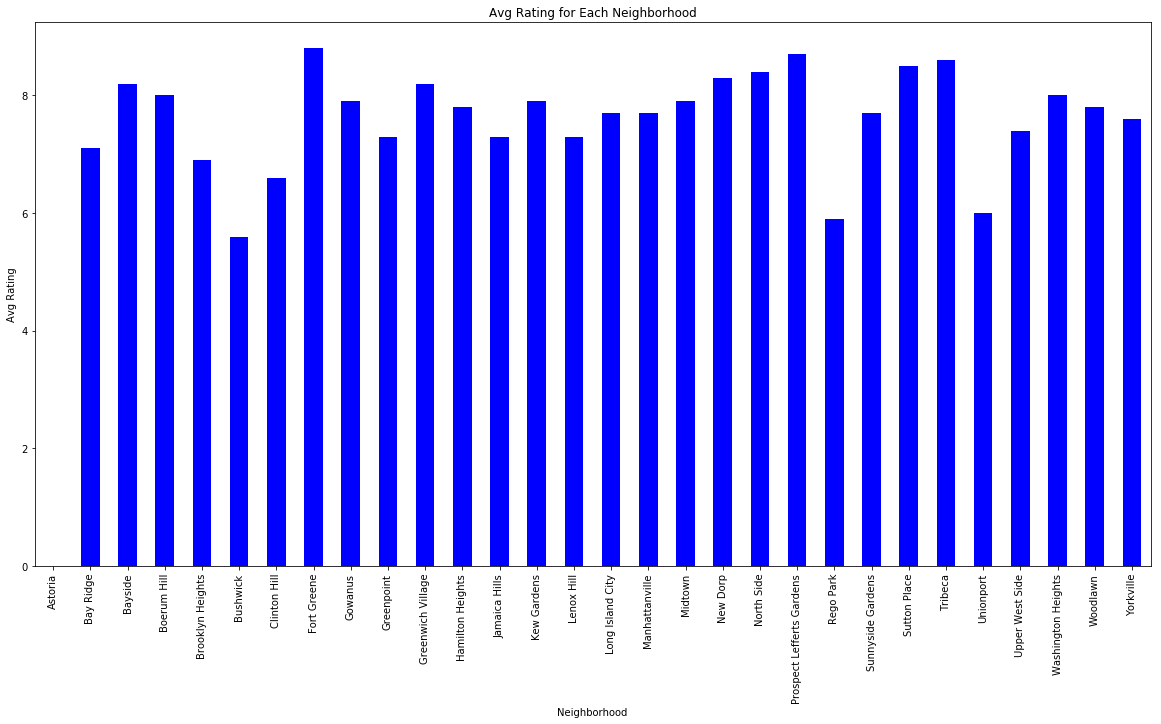

In [28]:
indian_rest_stats_ny.groupby('Neighborhood').mean()['Rating'].plot.bar(figsize =(20,10),color = 'blue')
plt.ylabel('Avg Rating')
plt.title('Avg Rating for Each Neighborhood')
plt.show()

In [29]:
borough_stats = indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
borough_stats.columns = ['Borough','Avg Rating']
borough_stats = borough_stats.sort_values(['Avg Rating'],ascending = True)
borough_stats

,Borough,Avg Rating
3,Queens,6.385714
0,Bronx,6.900000
1,Brooklyn,7.445455
2,Manhattan,7.900000
4,Staten Island,8.300000


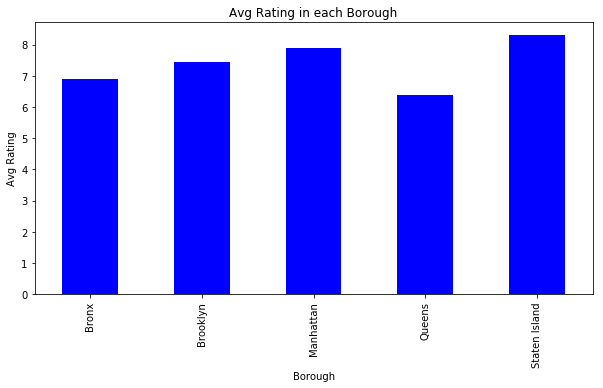

In [30]:
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(10,5),color = 'blue')
plt.ylabel('Avg Rating')
plt.title('Avg Rating in each Borough')
plt.show()

In [33]:
indian_rest_stats_ny[indian_rest_stats_ny['Borough']=='Queens']

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
22,Queens,Astoria,0,0,0.0,0.0,0.0
23,Queens,Kew Gardens,5782c9ce498edde587f5aa14,Tikka Indian Grill,10.0,7.9,2.0
24,Queens,Long Island City,50a287a7e4b0033f830f06db,Raj's Indian Kitchen,25.0,7.7,13.0
25,Queens,Rego Park,4b3a8aa5f964a520996925e3,Sajni 026,3.0,5.9,6.0
26,Queens,Bayside,4f1f4996e4b01ff351a7a50c,Ayna Agra Indian Restaurant,38.0,8.2,12.0
28,Queens,Jamaica Hills,4c434b2bd691c9b6ef8f8f0a,Sagar Restaurant,10.0,7.3,6.0
30,Queens,Sunnyside Gardens,4c48da9f3013a59356c5f0e1,Saffron Garden,17.0,7.7,16.0


In [34]:
indian_rest_stats_ny[indian_rest_stats_ny['Borough']=='Bronx']

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5.0,7.8,10.0
1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3.0,6.0,2.0
